# Laboratory Work #4 "DataFrames Merging, Data Aggregation and Data Visualization"
## Executed by student of group KN-222b.e. Miniailo Dmytro

**Objective:** Learning pandas methods for data merging and aggregation

#### Libraries used in the tasks

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

#### 1. Load the energy data from the file “En_In.xls”, which is a list of indicators of energy supply and renewable electricity production, and put into a DataFrame

In [6]:
df = pd.read_excel(
    io='En_In.xls',
    skiprows=17,
    usecols="C:F",
    names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],
    engine='xlrd'
)

df = df.drop(df.tail(38).index)
df.index = range(1, len(df) + 1)

df

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,321,10,78.669280
2,Albania,102,35,100.000000
3,Algeria,1959,51,0.551010
4,American Samoa,...,...,0.641026
5,Andorra,9,121,88.695650
...,...,...,...,...
223,Viet Nam,2554,28,45.321520
224,Wallis and Futuna Islands,0,26,0.000000
225,Yemen,344,13,0.000000
226,Zambia,400,26,99.714670


#### 2. Convert „Energy Supply’ to gigajoules (Note: there are 1,000,000 gigajoules  in a petajoule). For all countries which have missing data (e.g  data with "..." make sure this is reflected as np.NaN value.

In [8]:
df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce')
df['Energy Supply'] *= 1_000_000
df.replace("...", np.nan, inplace=True)

df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Afghanistan,3.210000e+08,10,78.669280
2,Albania,1.020000e+08,35,100.000000
3,Algeria,1.959000e+09,51,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+06,121,88.695650


#### 3. There are several countries with numbers and/or parenthesis in their name. Be sure to remove these.

In [10]:
df['Country'] = df['Country'].str.replace(r'\s*\(.*?\)', '', regex=True)
df['Country'] = df['Country'].str.replace(r'\d+', '', regex=True)
df['Country'] = df['Country'].str.strip()

df.iloc[[24, 197, 98]]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
25,Bolivia,3.360000e+08,32,31.477120
198,Switzerland,1.113000e+09,136,57.745480
99,Iran,9.172000e+09,119,5.707721


#### 4. Rename the provided list of countries:

In [12]:
replacements = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

df['Country'] = df['Country'].replace(replacements)
df.loc[df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
4,American Samoa,NaN,NaN,0.641026
25,Bolivia,3.360000e+08,32,31.477120
165,South Korea,1.100700e+10,221,2.279353


#### 5. Next, load the GDP data from the file “gpd.csv”.

In [14]:
gdp = pd.read_csv("gpd.csv", skiprows=4)

gpd_replacements = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp.iloc[:, 0] = gdp.iloc[:, 0].replace(gpd_replacements)

gdp.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


#### 6. Load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file 'scimagojr.xlsx'

In [16]:
sciamgo = pd.read_excel(io='scimagojr.xlsx', engine='openpyxl')

sciamgo.head(3)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134


#### 7. Join the three datasets from tasks 1-6 into a new dataset (using the intersection of country names)

In [18]:
gdp.rename(columns={'Country Name': 'Country'}, inplace=True)

sciamgo_top15 = sciamgo[sciamgo['Rank'] <= 15]
gdp_last_10_years = gdp[['Country'] + [str(year) for year in range(2006, 2016)]]

merged = pd.merge(sciamgo_top15, gdp_last_10_years, on='Country', how='inner')
result = pd.merge(merged, df, on='Country', how='inner')
result.set_index('Country', inplace=True)

columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 
           'Self-citations', 'Citations per document', 'H index', 
           'Energy Supply', 'Energy Supply per Capita', '% Renewable'] + \
          [str(year) for year in range(2006, 2016)]

result = result[columns]

result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


#### 8. Create a function to define what are the top 15 countries for average GDP over the last 10 years

In [20]:
def task_eight():
    result['Average GDP (2006-2015)'] = result.loc[:, '2006':'2015'].mean(axis=1)
    
    return result['Average GDP (2006-2015)'].sort_values(ascending=False)

In [21]:
task_eight()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: Average GDP (2006-2015), dtype: float64

#### 9. Create a function to define by how much had the GDP changed over the past 10 year for the country with the 5th largest average GDP

In [23]:
def task_nine():
    result['Average GDP (2006-2015)'] = result.loc[:, '2006':'2015'].mean(axis=1)
    top_5_country = result['Average GDP (2006-2015)'].sort_values(ascending=False).index[4]
    gdp_change = float(result.loc[top_5_country, '2015'] - result.loc[top_5_country, '2006'])

    return (top_5_country, gdp_change)

In [24]:
task_nine()

('France', 153345695364.24023)

#### 10. Create a function to define what country has the maximum % Renewable and what is the percentage

In [26]:
def task_ten():
    max_renewable_country = result['% Renewable'].idxmax()
    max_renewable_value = float(result['% Renewable'].max())

    return (max_renewable_country, max_renewable_value)

In [27]:
task_ten()

('Brazil', 69.64803)

#### 11. Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the sixth most populous country according to this estimate?

In [29]:
def task_eleven():
    result['Estimated Population'] = result['Energy Supply'] / result['Energy Supply per Capita']
    top_6_populous_country = result['Estimated Population'].sort_values(ascending=False).index[5]
    population = result.loc[top_6_populous_country, 'Estimated Population']

    return (top_6_populous_country, population)

In [30]:
task_eleven()

('Japan', 127409395.97315437)

#### 12. Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation)

In [32]:
def task_twelve():
    result['Citable Documents per Capita'] = result['Citable documents'] / result['Estimated Population']
    correlation = float(result['Citable Documents per Capita'].corr(result['Energy Supply per Capita']))
    
    return correlation

In [33]:
task_twelve()

0.7940010435442946

#### 13. Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median

In [35]:
def task_thirteen():
    median = result['% Renewable'].median()
    result['Above median renewable'] = (result['% Renewable'] >= median).astype(int)

    return result['Above median renewable']

In [36]:
task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Above median renewable, dtype: int32

#### 14. Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

In [38]:
continents = {
    'China': 'Asia',
    'South Korea': 'Asia',
    'Japan': 'Asia',
    'India': 'Asia',
    'Iran': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Australia': 'Australia',
    'United States': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America'
}

In [39]:
def task_fourteen():
    result['Continent'] = result.index.map(continents)
    grouped = result.groupby('Continent')['Estimated Population']
    summary_df = grouped.agg(['size', 'sum', 'mean', 'std']).reset_index()
    summary_df.set_index('Continent', inplace=True)
    
    return summary_df

In [40]:
task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


#### 15. Create a bubble chart showing % Renewable vs. Rank

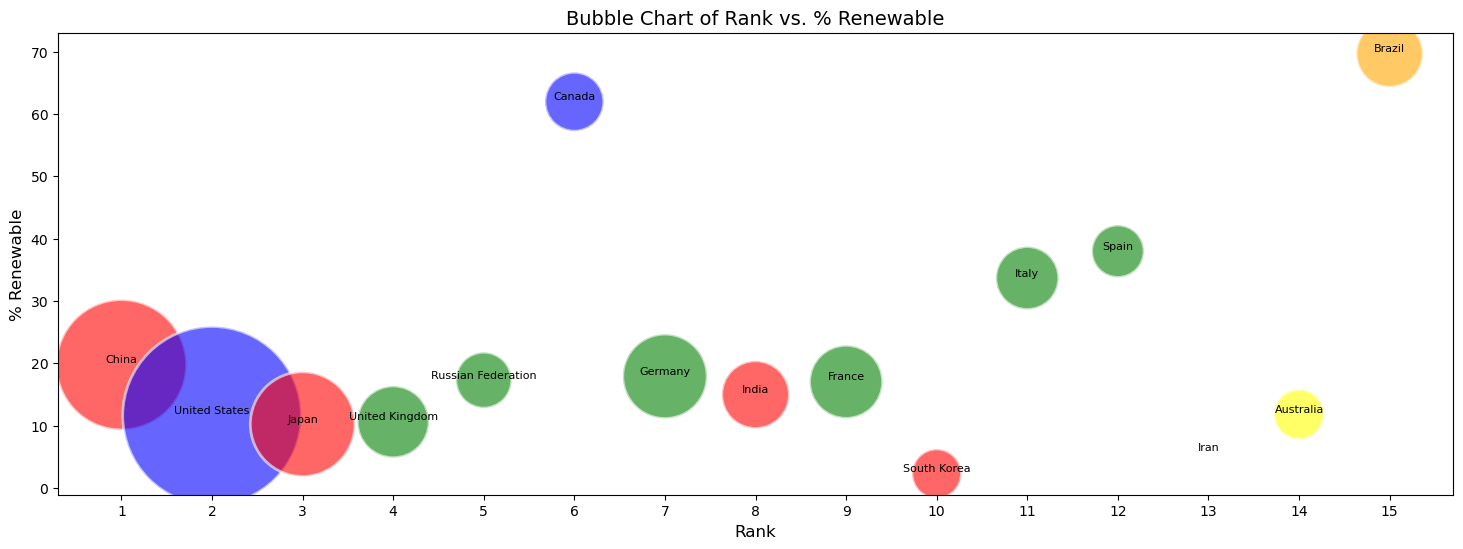

In [42]:
result['Continent'] = result.index.map(continents)

rank_values = result['Rank']
renewable_values = result['% Renewable'] 
bubble_size = result['2015'] / 1e9  

continent_colors = {
    'Asia': 'red',
    'Europe': 'green',
    'North America': 'blue',
    'South America': 'orange',
    'Australia': 'yellow',
}

plt.figure(figsize=(18, 6))
bubble = plt.scatter(rank_values, renewable_values, s=bubble_size, c=result['Continent'].map(continent_colors), alpha=0.6, edgecolors="w", linewidth=2)

for i in range(len(result)):
    country = result.index[i] 
    plt.text(rank_values.iloc[i], renewable_values.iloc[i], country, fontsize=8, ha='center', va='bottom') 

plt.title('Bubble Chart of Rank vs. % Renewable', fontsize=14)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('% Renewable', fontsize=12)
plt.xticks(ticks=range(1, 16))
plt.grid(False)

plt.show()

**Conclusion:** During this laboratory work, I was gaining skills in DataFrames merging, data aggregation and data visualization.